- 結果表示は43210の順

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit import IBMQ, Aer, execute
from qiskit.tools.visualization import plot_histogram, circuit_drawer
import Qconfig

provider = IBMQ.load_account()

In [2]:
provider

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [3]:
backends = provider.backends()

In [4]:
backends

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
from qiskit.transpiler import PassManager
from qiskit.transpiler.passes import Unroller

In [6]:
#cutedge checker
def ccheck(a, b, c): 
    qc.cx(q[a], q[c]) 
    qc.cx(q[b], q[c])
#half adder
#入力: a,b
#出力:和s,キャリーc
def hadder(a,b,s,c):
    #XOR
    qc.cx(q[b], q[s])
    qc.cx(q[a], q[s])
    #AND
    qc.ccx(q[a], q[b], q[c])
#inverse operations
def iccheck(a, b, c): 
    qc.cx(q[b], q[c])
    qc.cx(q[a], q[c]) 
def ihadder(a,b,s,c):
    qc.ccx(q[a], q[b], q[c])
    qc.cx(q[a], q[s])
    qc.cx(q[b], q[s])
#diffusion operations
def diffusion(a,b,c):
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])    
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[c])  
    qc.ccx(q[a],q[b], q[c])
    qc.h(q[c])  
    qc.x(q[a])
    qc.x(q[b])
    qc.x(q[c])
    qc.h(q[a])
    qc.h(q[b])
    qc.h(q[c])
def diffusion(q):
    qc.h(q[0:4])
    qc.barrier()
    qc.x(q[0:4])
    qc.barrier()
    qc.h(q[3])
    qc.mct([q[0],q[1],q[2]], q[3] , [q[7]], mode='basic')
    qc.h(q[3])
    qc.barrier()
    qc.x(q[0:4])
    qc.barrier()
    qc.h(q[0:4])


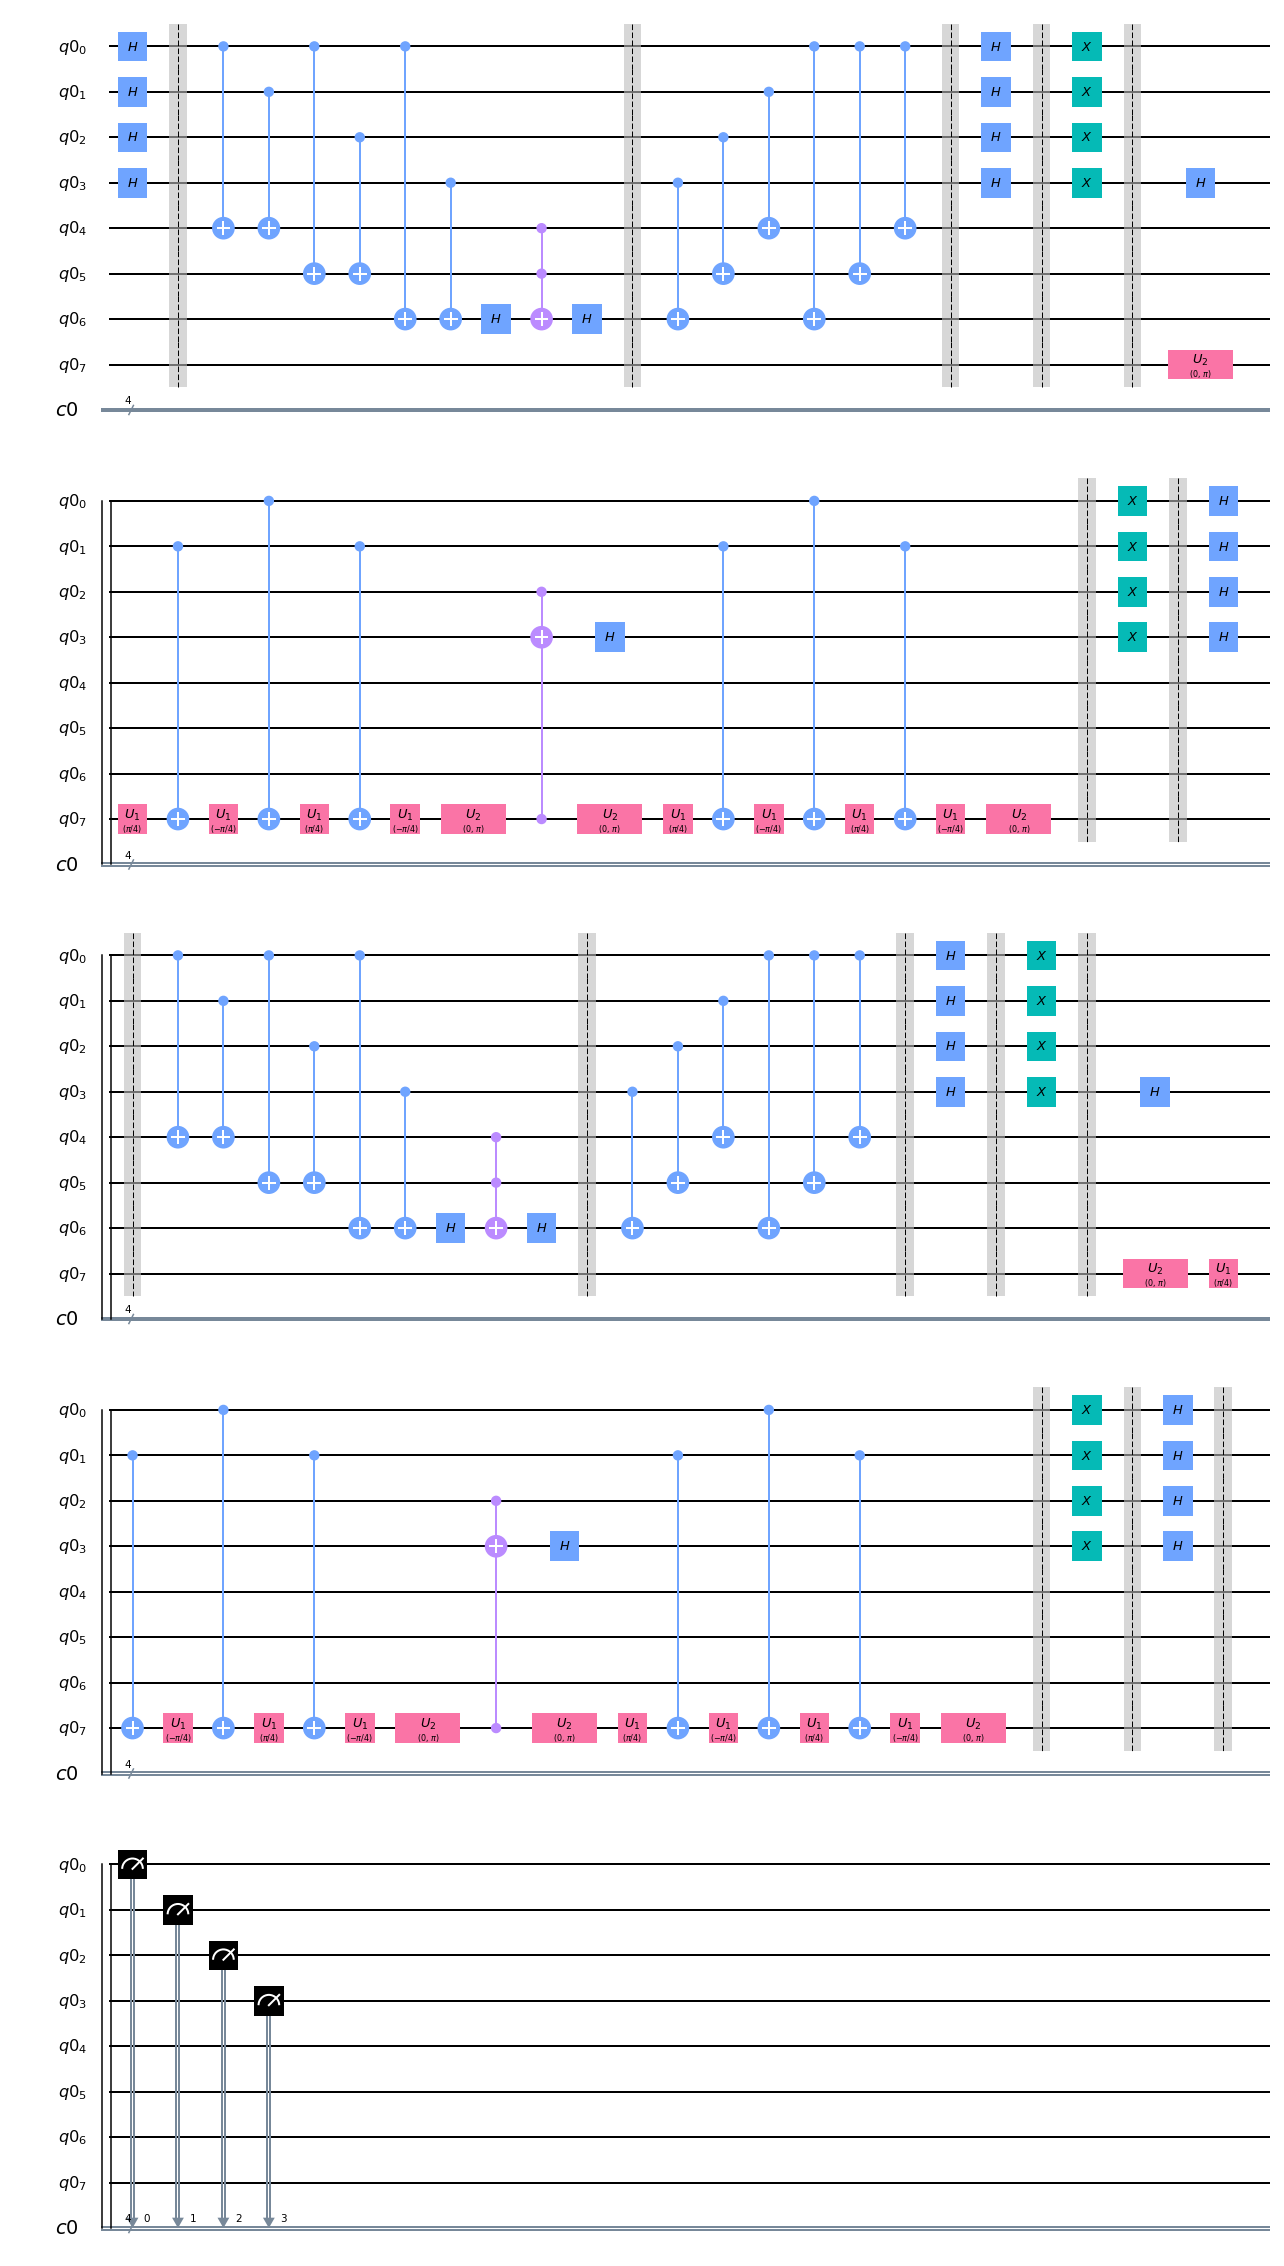

In [7]:
q = QuantumRegister(8)
c = ClassicalRegister(4)
qc = QuantumCircuit(q,c)
ite = 2

#入力全ての可能性
qc.h(q[0:4])

qc.barrier()

for i in range(ite):
    #cut countingを4, 5, 6に詰める
    ccheck(0,1,4)
    ccheck(0,2,5)
    ccheck(0,3,6)

    #符号反転
    qc.h(q[6])
    qc.ccx(q[4], q[5], q[6])
    qc.h(q[6])
    qc.barrier()

    #逆順にして初期状態に戻す
    iccheck(0,3,6)
    iccheck(0,2,5)
    iccheck(0,1,4)

    qc.barrier()

    diffusion(q)

    qc.barrier()

#測定する
qc.measure(q[0:4], c[0:4])
#描く
qc.draw(output='mpl')

{'1010': 48, '0110': 41, '1101': 32, '0010': 32, '1110': 4699, '1100': 37, '1000': 42, '1111': 34, '1001': 43, '0000': 28, '0001': 4764, '0100': 36, '0111': 42, '0011': 41, '1011': 46, '0101': 35}


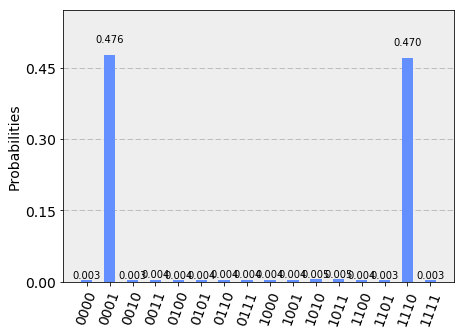

In [8]:
backend = Aer.get_backend('qasm_simulator')
job = execute(qc, backend, shots=10000)
result = job.result()
count =result.get_counts()
print(count)
plot_histogram(count)

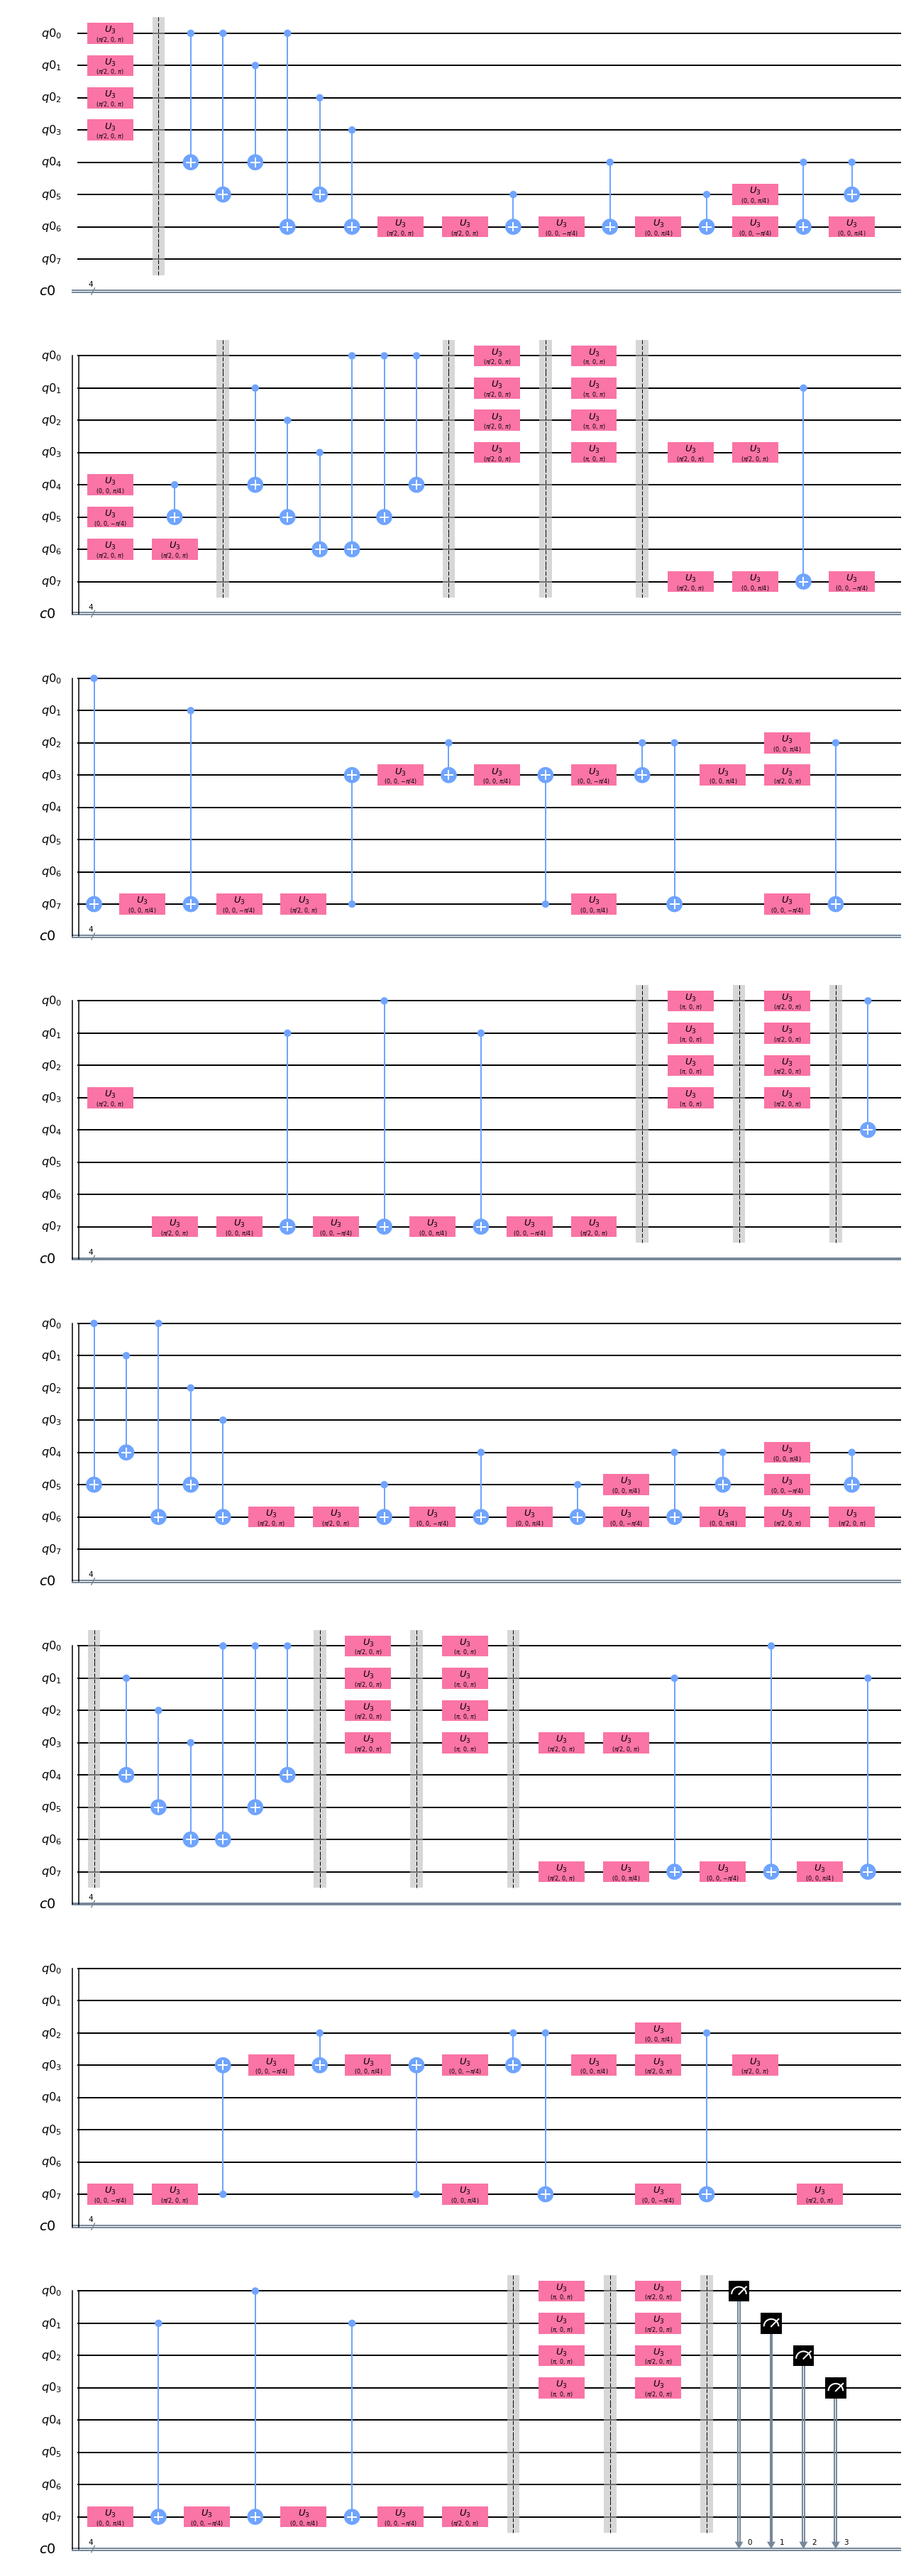

In [9]:
pass_ = Unroller(['u3', 'cx'])
pm = PassManager(pass_)
new_circuit = pm.run(qc) 
new_circuit.draw(output='mpl')

In [10]:
new_circuit.count_ops()

OrderedDict([('u3', 104), ('cx', 60), ('barrier', 15), ('measure', 4)])

$104+10\times60=704$

In [12]:
import json
dct = new_circuit.count_ops()
with open('wk3_output_tmp.txt', 'w') as f:
    f.write(json.dumps(dct))